Assignment

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500;
The KP481 is for mid-level runners and sells for $1,750;
The KP781 treadmill is having advanced features and it sells for $2,500.

Data Description

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

Product - product purchased: KP281, KP481, or KP781
Age - in years
Gender - male/female
Education - in years
MaritalStatus - single or partnered
Usage - the average number of times the customer plans to use the treadmill each week
Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
Income - annual income in US dollars
Miles - the average number of miles the customer expects to walk/run each week

Practicalities

Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Anirudh Nagaraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('aerofit_treadmill_data.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Ages range between 18 and 50. The mean is 28. Most customers are young adults with 50% below the age of 26. There may be a right skew, where the mean is higher than the median.
Education: 15.6 is the mean, which is around an undergraduate level. Over 75% of the population had education under 16 years indicating that they are not post graduates. 
Usage: Most people use the product moderately, but a few high frequency users drive the upper bound
Fitness: Most users are moderately fit, around a self rating of 3. 
Income: The income distribution is right skewed, with a few hihg income individuals raising the average. 
Miles: Wide variation in the usge, with some users logging long distances. Standard deviation is high suggesting that outliers may exist

In [5]:
#Check for missing values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing values

In [7]:
#Examine categorical variables: Product, Gender, Marital Status

df['Product'].value_counts()


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()


Gender
Male      104
Female     76
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Exploratory Data Analysis


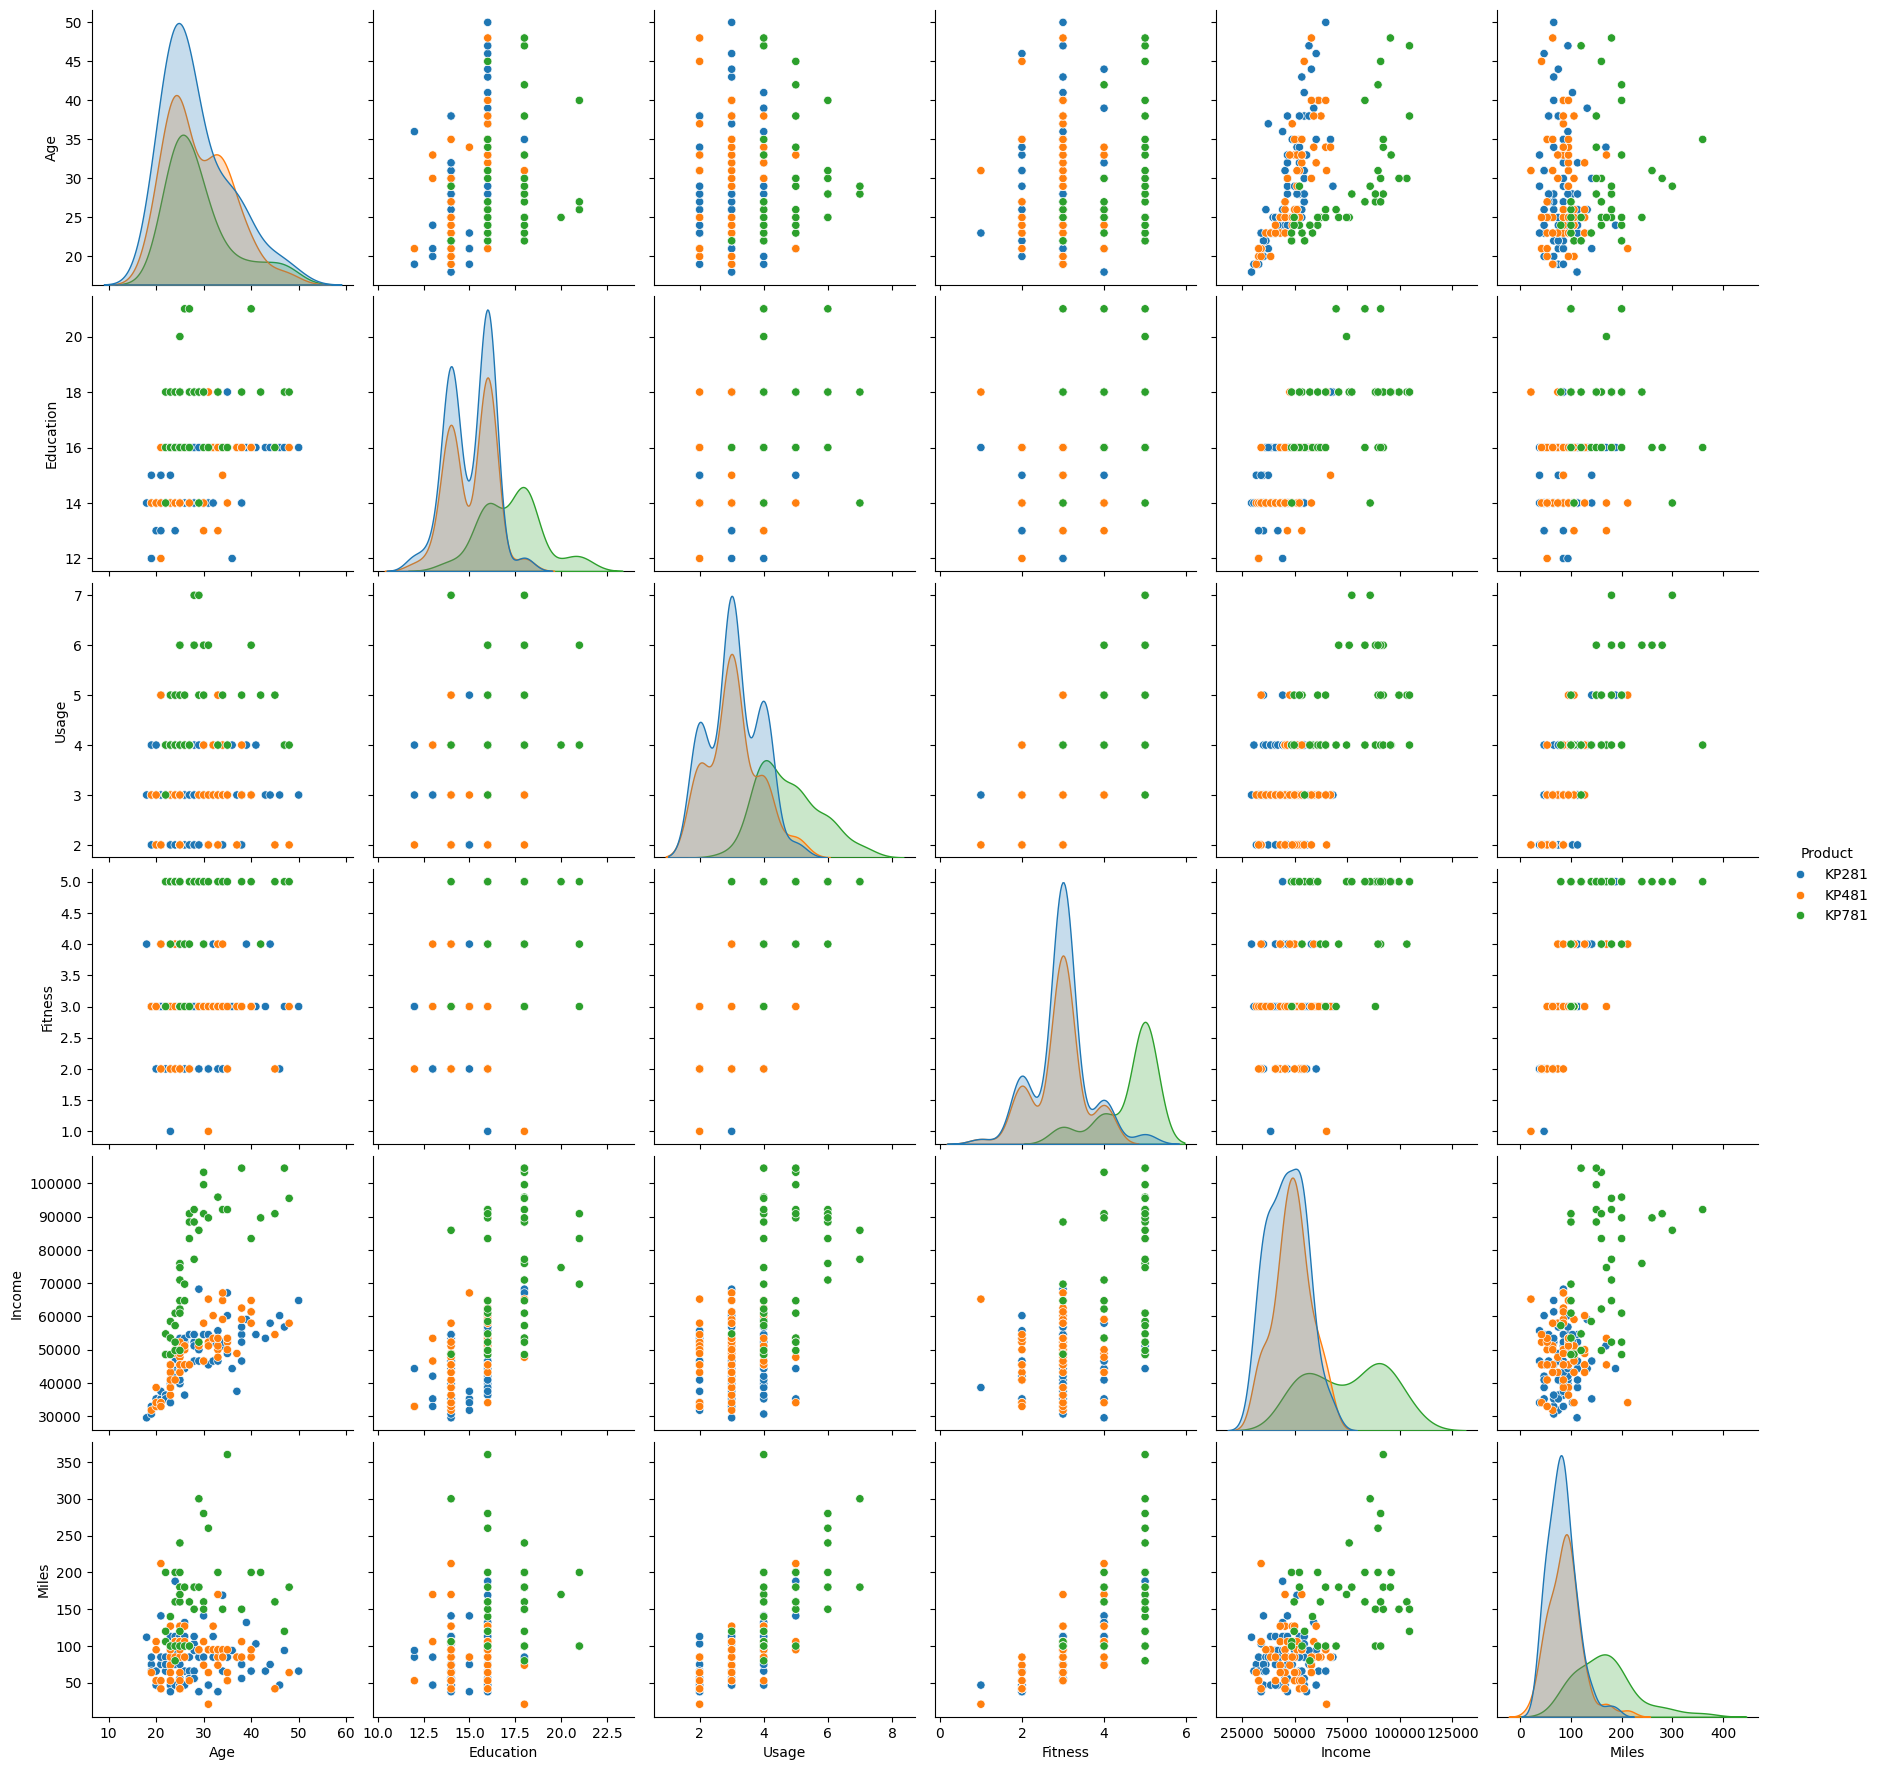

In [14]:
sns.pairplot(df, hue='Product', height=3);
plt.show()

KP281 and KP4812 are more commonly purchased by mid and lower income individuals, while the KP781 is strongly associated with higher income earners.
KP781 owners ride more miles than the KP281 and 481 owners
Higher income individuals also tend to accumulate more miles overall, indicating a positive relationship between income and total riding activity.
The KP781 also appears to be used more frequently. Its owners have higher usage scores and fewer loe-usage instances.
Age and background do not strongly differentiate between product groups.




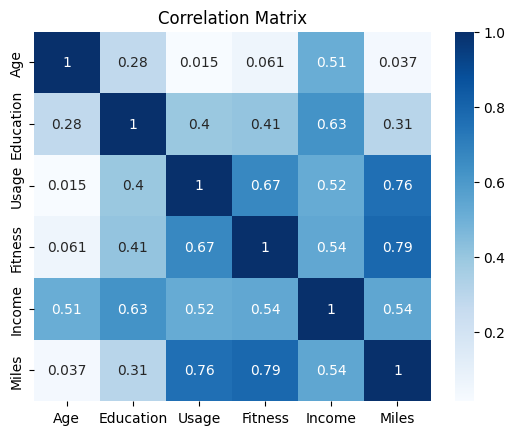

In [15]:
df_numeric = df.select_dtypes(include='number')
df_numeric = df.drop(columns=['Product', 'Gender', 'MaritalStatus'])  # and any other object-type columns
df_encoded = pd.get_dummies(df, columns=['Product', 'Gender', 'MaritalStatus'], drop_first=True)

# Correlation Matrix
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

1. Miles ridden has a positive correlation with Usage and Fitness. People who use the bike frequently and ride more miles score higher on fitness. 
2. Income correlates positively with everything, strongest is with education which is accurate since more educated individuals earn more.

In [16]:
df.groupby('Product')[['Usage', 'Income', 'Miles']].mean()



,Usage,Income,Miles
Product,,,
KP281,3.087500,46418.025,82.787500
KP481,3.066667,48973.650,87.933333
KP781,4.775000,75441.575,166.900000


As we see in the pairplot, mean income is higher for K781 owners.
K781 riders average 167 miles vs the other other 2 products that range from 80-90.
K781 riders also use the bike more than the riders of the other two.

In [17]:
df.groupby('MaritalStatus')[['Income', 'Miles']].mean()

,Income,Miles
MaritalStatus,,
Partnered,55763.000000,104.289720
Single,50724.424658,101.589041


The differences here are small indicating that marital status is not a strong behavioral driver.